In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Find the last point in the database:

last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(last_date)

('2017-08-23',)


In [42]:
# Calculate the date 1 year ago from the last data point in the database
# (Expecting to see 2016-8-23)

last_year = dt.date(2017,8,23) - dt.timedelta(days=365)
print(last_year)

2016-08-23


In [12]:
# Perform a query to retrieve the data and precipitation scores

prcp = session.query(Measurement.date,Measurement.prcp).\
    filter(Measurement.date > one_year_ago).\
    order_by(Measurement.date).all()

In [13]:
# Save the query results as a Pandas DataFrame and set the index to the date column

prcp_df = pd.DataFrame(prcp, columns=['date','prcp'])
prcp_df.set_index('date').head()

,prcp
date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,NaN
2016-08-24,1.22


In [14]:
# Sort the dataframe by date

datesort = prcp_df.sort_values(by=['date'])
datesort.head()

,date,prcp
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22


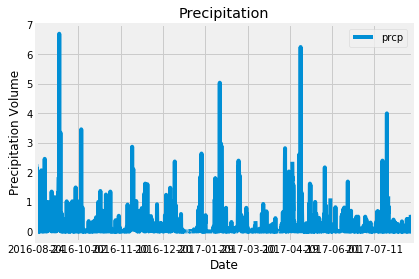

In [19]:
# Use Pandas Plotting with Matplotlib to plot the data
prcp_df.plot('date', 'prcp')
plt.xlabel("Date")
plt.ylabel("Precipitation Volume")
plt.title("Precipitation")
plt.show()
plt.close(prcp_table) 

![precipitation](Images/precipitation.png)

In [20]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


![describe](Images/describe.png)

In [22]:
# Design a query to show how many stations are available in this dataset?
station_amt = session.query(Measurement).group_by(Measurement.station).count()
print(station_amt)

9


In [29]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
stations_by_activity = session.query(Measurement.station, func.count(Measurement.tobs)).\
group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc()).all()
for station, count in stations_by_activity: 
     print("For",station,"there were",count,"total temperature observations.")

For USC00519281 there were 2772 total temperature observations.
For USC00519397 there were 2724 total temperature observations.
For USC00513117 there were 2709 total temperature observations.
For USC00519523 there were 2669 total temperature observations.
For USC00516128 there were 2612 total temperature observations.
For USC00514830 there were 2202 total temperature observations.
For USC00511918 there were 1979 total temperature observations.
For USC00517948 there were 1372 total temperature observations.
For USC00518838 there were 511 total temperature observations.


In [39]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
topstation = stations_by_activity[0][0]
topstation_values = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs),
                                  func.avg(Measurement.tobs)).filter(Measurement.station == topstation).all()
print(f"Temperature Extremes and Average at the most active Weather Station", topstation)
print(f"Low: {topstation_values[0][0]} High: {topstation_values[0][1]} Average: {round(topstation_values[0][2], 1)}")

Temperature Extremes and Average at the most active Weather Station USC00519281
Low: 54.0 High: 85.0 Average: 71.7


In [48]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station...
topstation_12month = session.query(Measurement.station, Measurement.date, Measurement.tobs).\
    filter(Measurement.station == topstation).\
    filter(Measurement.date > last_year).\
    order_by(Measurement.date).all()
temp_df = pd.DataFrame(topstation_12month)
temp_df.head()

,station,date,tobs
0,USC00519281,2016-08-24,77.0
1,USC00519281,2016-08-25,80.0
2,USC00519281,2016-08-26,80.0
3,USC00519281,2016-08-27,75.0
4,USC00519281,2016-08-28,73.0


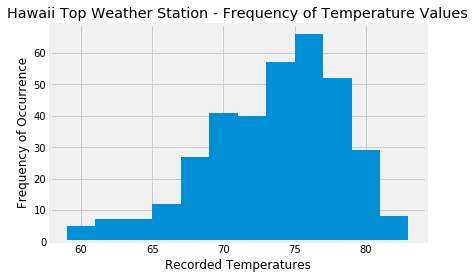

In [49]:
#...and plot the results as a histogram

plt.hist(temp_df['tobs'], bins=12)
plt.xlabel("Recorded Temperatures")
plt.ylabel("Frequency of Occurrence")
plt.title("Hawaii Top Weather Station - Frequency of Temperature Values")
plt.show()

![precipitation](Images/station-histogram.png)